In [1]:
# Import Python Package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Python Package for Scikit Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\sehja\Downloads\untitled Folder2\honda_sell_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4999 non-null   int64  
 1   Make                     4999 non-null   object 
 2   Model                    4999 non-null   object 
 3   Condition                4999 non-null   object 
 4   Price                    4999 non-null   object 
 5   Consumer_Rating          4999 non-null   float64
 6   Consumer_Review_#        4999 non-null   int64  
 7   Exterior_Color           4988 non-null   object 
 8   Interior_Color           4988 non-null   object 
 9   Drivetrain               4988 non-null   object 
 10  MPG                      3514 non-null   object 
 11  Fuel_Type                4988 non-null   object 
 12  Transmission             4988 non-null   object 
 13  Engine                   4988 non-null   object 
 14  VIN                     

In [4]:
df.describe()

,Year,Consumer_Rating,Consumer_Review_#,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating
count,4999.000000,4999.000000,4999.000000,4447.00000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000
mean,2020.507702,4.569654,1288.366673,4.81754,4.706814,4.663931,4.580976,4.731954,4.866269
std,3.711361,0.542453,1969.998095,0.25903,0.476941,0.351680,0.372107,0.313093,0.190886
min,1981.000000,1.200000,0.000000,3.80000,3.000000,3.600000,3.600000,3.900000,4.000000
25%,2019.000000,4.400000,126.000000,4.70000,4.700000,4.500000,4.200000,4.600000,4.800000
50%,2022.000000,4.700000,697.000000,4.90000,4.800000,4.800000,4.600000,4.800000,5.000000
75%,2023.000000,4.900000,1695.500000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2023.000000,5.000000,29258.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# calculate percentage of missing values in each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# print number of null values in each column
print(missing_percent)

Year                        0.000000
Make                        0.000000
Model                       0.000000
Condition                   0.000000
Price                       0.000000
Consumer_Rating             0.000000
Consumer_Review_#           0.000000
Exterior_Color              0.220044
Interior_Color              0.220044
Drivetrain                  0.220044
MPG                        29.705941
Fuel_Type                   0.220044
Transmission                0.220044
Engine                      0.220044
VIN                         0.220044
Stock_#                     0.220044
Mileage                     0.220044
Comfort_Rating             11.042208
Interior_Design_Rating     11.042208
Performance_Rating         11.042208
Value_For_Money_Rating     11.042208
Exterior_Styling_Rating    11.042208
Reliability_Rating         11.042208
State                       1.460292
Seller_Type                 1.460292
dtype: float64


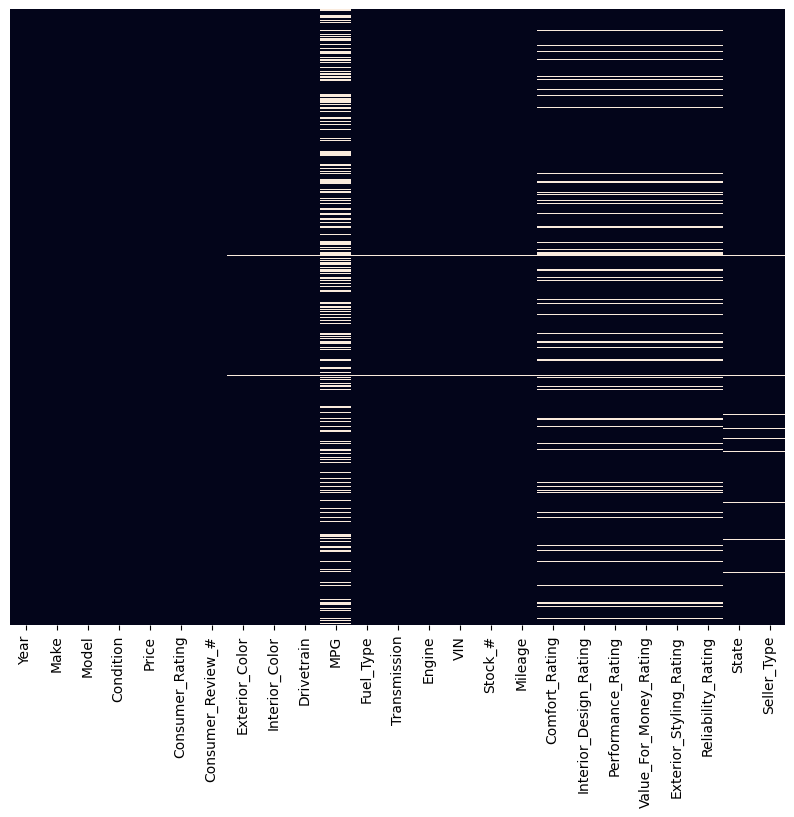

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8)) # Set the figure size
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, ax=ax) # Use the `ax` parameter to specify the subplot
plt.show() # Show the plot

In [7]:
# Formatting the MPG and taking the median from the interval
def split_MPG(text):
    if(pd.isna(text)):
        return text
    else:
        split = text.split('–')
       
        split = [float(i) for i in split]

        text = np.median(split)
    return text
print("Before")
print(df.MPG)
df.MPG = df.MPG.map(split_MPG)
print("After")
print(df.MPG)

Before
0         NaN
1         NaN
2         NaN
3       19–25
4         NaN
        ...  
4994    29–35
4995    33–40
4996    29–38
4997    20–30
4998      NaN
Name: MPG, Length: 4999, dtype: object
After
0        NaN
1        NaN
2        NaN
3       22.0
4        NaN
        ... 
4994    32.0
4995    36.5
4996    33.5
4997    25.0
4998     NaN
Name: MPG, Length: 4999, dtype: float64


In [8]:
#Fill the missing with mean of MPG
mean_mpg = df[df.MPG.isnull() ==False]['MPG'].mean()
df.MPG = df.MPG.fillna(mean_mpg)

In [9]:
import pandas as pd
import numpy as np

# perform mean imputation on the columns with missing values
df_mean_imputed = df.fillna(df.mean())

# print the DataFrame after mean imputation
print(df_mean_imputed)


      Year   Make                      Model Condition    Price  \
0     2023  Honda              Ridgeline RTL       New  $46,370   
1     2023  Honda          CR-V Hybrid Sport       New  $34,150   
2     2023  Honda          CR-V Hybrid Sport       New  $34,245   
3     2022  Honda           Pilot TrailSport       New  $46,500   
4     2023  Honda  CR-V Hybrid Sport Touring       New  $40,395   
...    ...    ...                        ...       ...      ...   
4994  2018  Honda               Accord Sport      Used  $19,999   
4995  2020  Honda                     Fit LX      Used  $17,495   
4996  2018  Honda                Civic Sport      Used  $19,500   
4997  2011  Honda                Accord EX-L      Used  $17,998   
4998  2023  Honda                Pilot Elite       New  $53,325   

      Consumer_Rating  Consumer_Review_#           Exterior_Color  \
0                 4.8                  9     Platinum White Pearl   
1                 1.7                 24     Platinum Whi

C:\Users\sehja\AppData\Local\Temp\ipykernel_18540\4243907852.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean_imputed = df.fillna(df.mean())


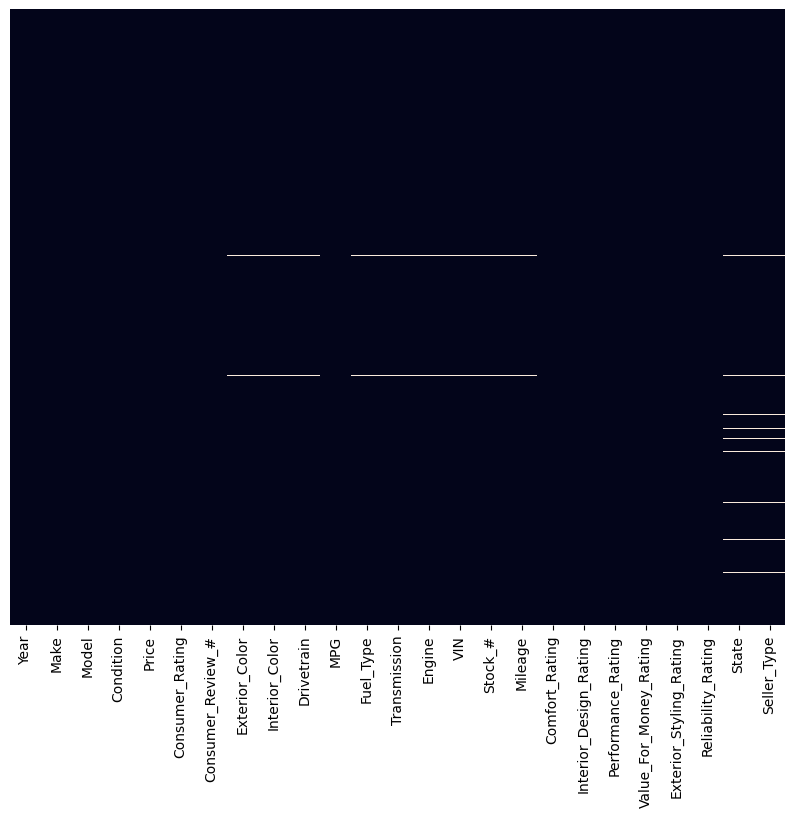

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8)) # Set the figure size
sns.heatmap(df_mean_imputed.isnull(), yticklabels=False, cbar=False, ax=ax) # Use the `ax` parameter to specify the subplot
plt.show() # Show the plot

C:\Users\sehja\AppData\Local\Temp\ipykernel_18540\2643259464.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_mean_imputed.corr()


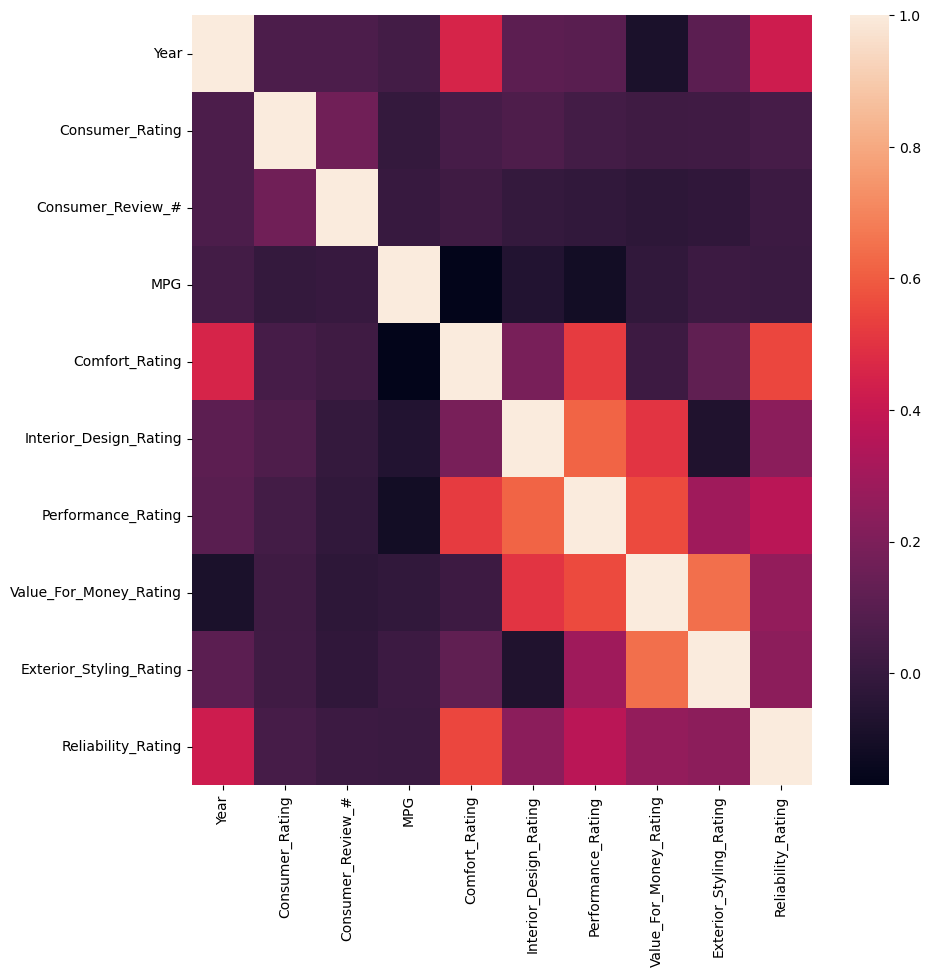

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_mean_imputed.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix)
plt.show()


In [12]:
df_mean_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4999 non-null   int64  
 1   Make                     4999 non-null   object 
 2   Model                    4999 non-null   object 
 3   Condition                4999 non-null   object 
 4   Price                    4999 non-null   object 
 5   Consumer_Rating          4999 non-null   float64
 6   Consumer_Review_#        4999 non-null   int64  
 7   Exterior_Color           4988 non-null   object 
 8   Interior_Color           4988 non-null   object 
 9   Drivetrain               4988 non-null   object 
 10  MPG                      4999 non-null   float64
 11  Fuel_Type                4988 non-null   object 
 12  Transmission             4988 non-null   object 
 13  Engine                   4988 non-null   object 
 14  VIN                     

In [13]:
# This gives us the number of different values in each ccolumns
for col in df_mean_imputed.columns:
    print(col, df_mean_imputed[col].nunique())

Year 33
Make 1
Model 146
Condition 3
Price 2333
Consumer_Rating 36
Consumer_Review_# 1037
Exterior_Color 172
Interior_Color 62
Drivetrain 7
MPG 57
Fuel_Type 7
Transmission 58
Engine 75
VIN 4988
Stock_# 4966
Mileage 2416
Comfort_Rating 14
Interior_Design_Rating 14
Performance_Rating 16
Value_For_Money_Rating 15
Exterior_Styling_Rating 13
Reliability_Rating 12
State 53
Seller_Type 2


In [14]:
import pandas as pd

# count the number of occurrences of each unique value in the 'Model' column
counts = df_mean_imputed['Model'].value_counts()

print(counts)


CR-V EX-L                    268
Pilot Sport                  228
Pilot EX-L                   204
Accord Sport 1.5T            195
CR-V Hybrid Sport Touring    185
                            ... 
Ridgeline RTX                  1
Odyssey EX-L/RES               1
Accord VP                      1
CR-Z Base (M6)                 1
Accord EX-L V-6                1
Name: Model, Length: 146, dtype: int64


In [15]:
import numpy as np

df_mean_imputed['Price'] = df_mean_imputed['Price'].str.replace('$', '').str.replace(',', '')
df_mean_imputed['Price'] = pd.to_numeric(df_mean_imputed['Price'], errors='coerce')
df_mean_imputed['Price'] = df_mean_imputed['Price'].replace('Not Priced', np.nan)


C:\Users\sehja\AppData\Local\Temp\ipykernel_18540\1877824454.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_mean_imputed['Price'] = df_mean_imputed['Price'].str.replace('$', '').str.replace(',', '')


In [16]:
import pandas as pd

# drop rows with missing values in the "Price" column
df_mean_imputed.dropna(subset=['Price'], inplace=True)


In [17]:
# display the encoded DataFrame
print(df_mean_imputed.head())

   Year   Make                      Model Condition    Price  Consumer_Rating  \
0  2023  Honda              Ridgeline RTL       New  46370.0              4.8   
1  2023  Honda          CR-V Hybrid Sport       New  34150.0              1.7   
2  2023  Honda          CR-V Hybrid Sport       New  34245.0              4.7   
3  2022  Honda           Pilot TrailSport       New  46500.0              5.0   
4  2023  Honda  CR-V Hybrid Sport Touring       New  40395.0              4.4   

   Consumer_Review_#           Exterior_Color Interior_Color  \
0                  9     Platinum White Pearl          Beige   
1                 24     Platinum White Pearl          Black   
2               2869  Meteorite Gray Metallic          Black   
3                 12         Sonic Gray Pearl          Black   
4                 12      Crystal Black Pearl          Black   

          Drivetrain  ...   Stock_# Mileage Comfort_Rating  \
0    All-wheel Drive  ...  00830164      10            5.0   
1   

In [18]:
import pandas as pd

# count the number of unique values in the 'Model' column
counts = df_mean_imputed['Model'].value_counts()

print(counts)



CR-V EX-L                    266
Pilot Sport                  220
Pilot EX-L                   204
Accord Sport 1.5T            194
CR-V Hybrid Sport Touring    185
                            ... 
Accord VP                      1
Prelude Si 4WS                 1
CR-Z EX-L                      1
Ridgeline RTX                  1
Accord EX-L V-6                1
Name: Model, Length: 146, dtype: int64


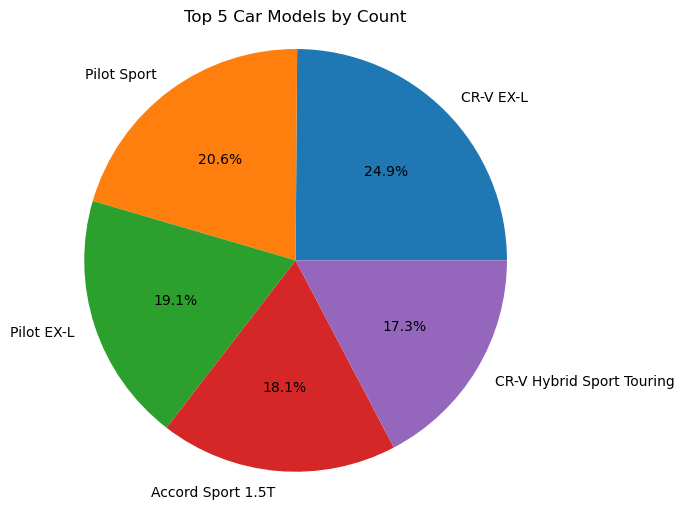

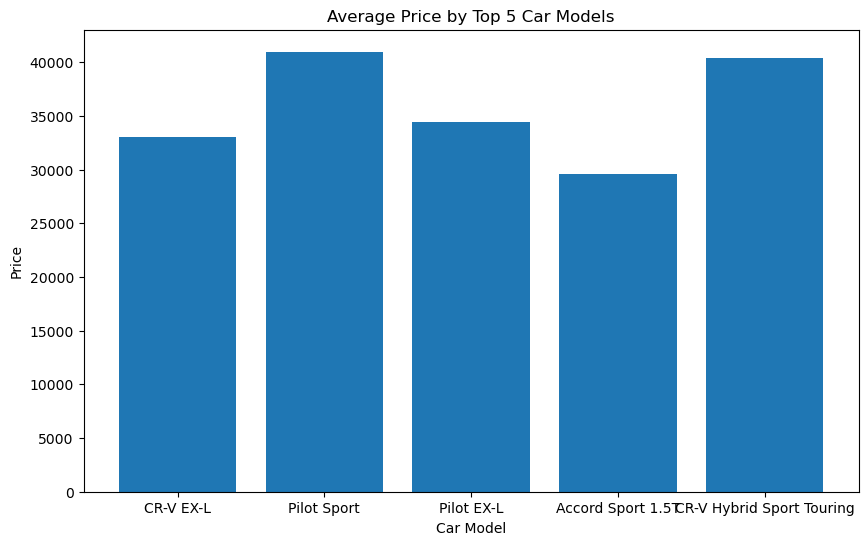

In [19]:
import matplotlib.pyplot as plt

# create pie chart
fig1 = plt.figure(figsize=(6, 6))
top_models = df_mean_imputed['Model'].value_counts().nlargest(5)
labels = top_models.index
sizes = top_models.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 5 Car Models by Count')

# create bar graph
fig2 = plt.figure(figsize=(10, 6))
top_models = df_mean_imputed['Model'].value_counts().nlargest(5).index
cat_price = df_mean_imputed.groupby('Model')['Price'].mean()[top_models]
plt.bar(cat_price.index, cat_price.values)
plt.title('Average Price by Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price')

plt.show()


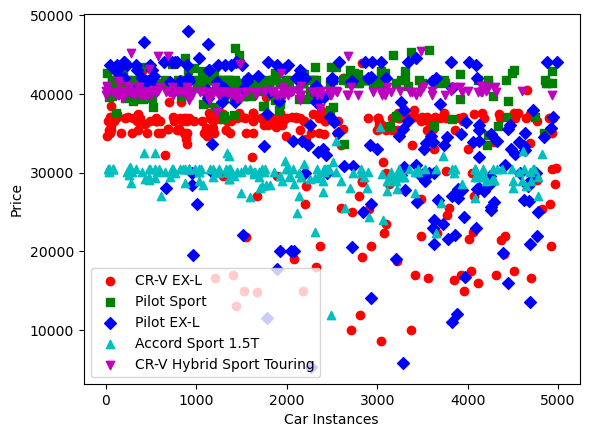

In [20]:
import matplotlib.pyplot as plt

# filter data for top 5 car models by frequency
top_models = df_mean_imputed['Model'].value_counts().nlargest(5).index
df_top_models = df_mean_imputed[df_mean_imputed['Model'].isin(top_models)]

# create scatter plot with different colors for each car model
colors = ['r', 'g', 'b', 'c', 'm']
markers = ['o', 's', 'D', '^', 'v']
fig, ax = plt.subplots()
for i, model in enumerate(top_models):
    df_model = df_top_models[df_top_models['Model'] == model]
    ax.scatter(df_model.index, df_model['Price'], color=colors[i], marker=markers[i], label=model)

# add legend and axis labels
ax.legend()
ax.set_xlabel('Car Instances')
ax.set_ylabel('Price')

plt.show()


In [69]:
import plotly.graph_objs as go
import pandas as pd

# create a dataframe of the top 5 car models by frequency and their mean price
top_models = df_mean_imputed['Model'].value_counts().nlargest(10).index
cat_price = df_mean_imputed.groupby('Model')['Price'].mean()[top_models]
df_top_models = pd.DataFrame({'Model': cat_price.index, 'Price': cat_price.values})
df_top_models = df_top_models.sort_values(by='Price')

# create a horizontal bar plot using plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df_top_models['Price'], y=df_top_models['Model'], orientation='h'))

# customize the layout of the plot
fig.update_layout(
    title='Top 10 Car Models by Frequency with respect to Price',
    xaxis_title='Price',
    yaxis_title='Model',
    margin=dict(l=100, r=20, t=70, b=70),
    height=400,
    width=800,
)

# add percentage labels to each bar
for i, v in enumerate(df_top_models['Price']):
    fig.add_annotation(
        x=v+500,
        y=df_top_models.iloc[i]['Model'],
        text='{:.1f}%'.format((df_mean_imputed['Model'].value_counts(normalize=True)*100)[df_top_models.iloc[i]['Model']]),
        showarrow=False,
        font=dict(size=15, color='black'),
    )

# show the plot
fig.show()


In [22]:
import pandas as pd

# count the number of occurrences of each unique value in the 'Condition' column
counts = df_mean_imputed['Condition'].value_counts()

print(counts)



New                2658
Used               2022
Honda Certified     280
Name: Condition, dtype: int64


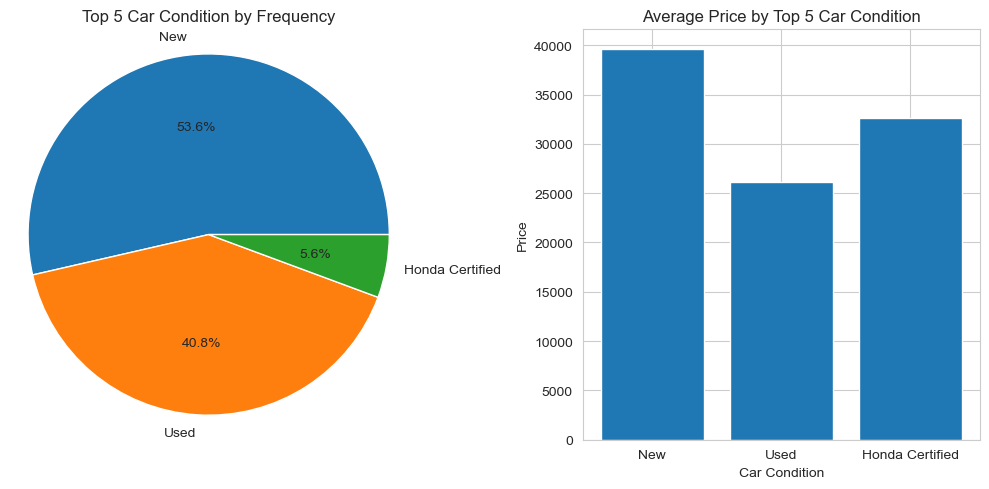

In [23]:
import matplotlib.pyplot as plt

# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot pie chart on first subplot
top_models = df_mean_imputed['Condition'].value_counts().nlargest(5)
labels = top_models.index
sizes = top_models.values
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Top 5 Car Condition by Frequency')

# plot bar chart on second subplot
top_models = df_mean_imputed['Condition'].value_counts().nlargest(5).index
cat_price = df_mean_imputed.groupby('Condition')['Price'].mean()[top_models]
ax2.bar(cat_price.index, cat_price.values)
ax2.set_title('Average Price by Top 5 Car Condition')
ax2.set_xlabel('Car Condition')
ax2.set_ylabel('Price')

# adjust spacing between subplots and show figure
plt.tight_layout()
plt.show()


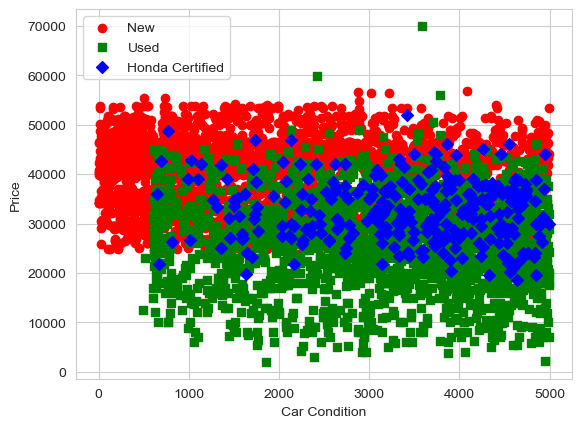

In [24]:
import matplotlib.pyplot as plt

# filter data for top 5 car models by frequency
top_models = df_mean_imputed['Condition'].value_counts().nlargest(5).index
df_top_models = df_mean_imputed[df_mean_imputed['Condition'].isin(top_models)]

# create scatter plot with different colors for each car model
colors = ['r', 'g', 'b', 'c', 'm']
markers = ['o', 's', 'D', '^', 'v']
fig, ax = plt.subplots()
for i, model in enumerate(top_models):
    df_model = df_top_models[df_top_models['Condition'] == model]
    ax.scatter(df_model.index, df_model['Price'], color=colors[i], marker=markers[i], label=model)

# add legend and axis labels
ax.legend()
ax.set_xlabel('Car Condition')
ax.set_ylabel('Price')

plt.show()


In [70]:
import plotly.graph_objs as go
import pandas as pd

# create a dataframe of the top 5 car models by frequency and their mean price
top_models = df_mean_imputed['Condition'].value_counts().nlargest(10).index
cat_price = df_mean_imputed.groupby('Condition')['Price'].mean()[top_models]
df_top_models = pd.DataFrame({'Condition': cat_price.index, 'Price': cat_price.values})
df_top_models = df_top_models.sort_values(by='Price')

# create a horizontal bar plot using plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df_top_models['Price'], y=df_top_models['Condition'], orientation='h'))

# customize the layout of the plot
fig.update_layout(
    title='Top 3 Car Condition by Frequency with respect to Price',
    xaxis_title='Price',
    yaxis_title='Model',
    margin=dict(l=100, r=20, t=70, b=70),
    height=400,
    width=800,
)

# add percentage labels to each bar
for i, v in enumerate(df_top_models['Price']):
    fig.add_annotation(
        x=v+500,
        y=df_top_models.iloc[i]['Condition'],
        text='{:.1f}%'.format((df_mean_imputed['Condition'].value_counts(normalize=True)*100)[df_top_models.iloc[i]['Condition']]),
        showarrow=False,
        font=dict(size=15, color='black'),
    )

# show the plot
fig.show()


In [26]:
import pandas as pd

# count the number of occurrences of each unique value in the 'Exterior_Color' column
counts = df_mean_imputed['Exterior_Color'].value_counts()

print(counts)


Platinum White Pearl     880
Crystal Black Pearl      567
Lunar Silver Metallic    345
Sonic Gray Pearl         327
Modern Steel Metallic    283
                        ... 
Gray Metallic              1
Blazing                    1
Slate Green Metallic       1
Silverstone Metallic       1
Dark Gray                  1
Name: Exterior_Color, Length: 172, dtype: int64


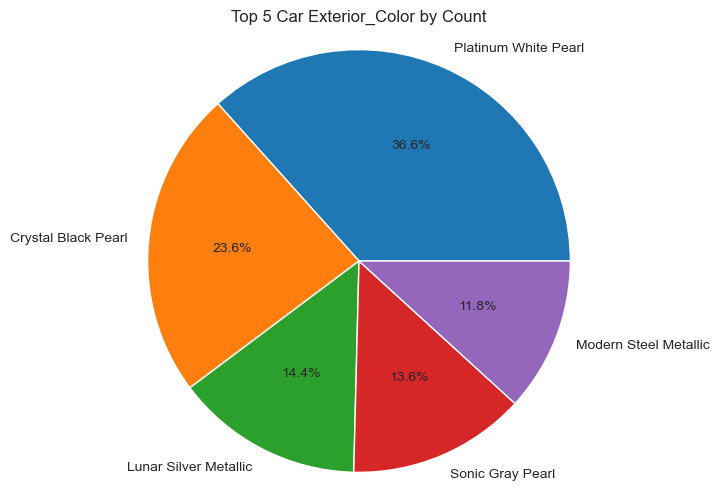

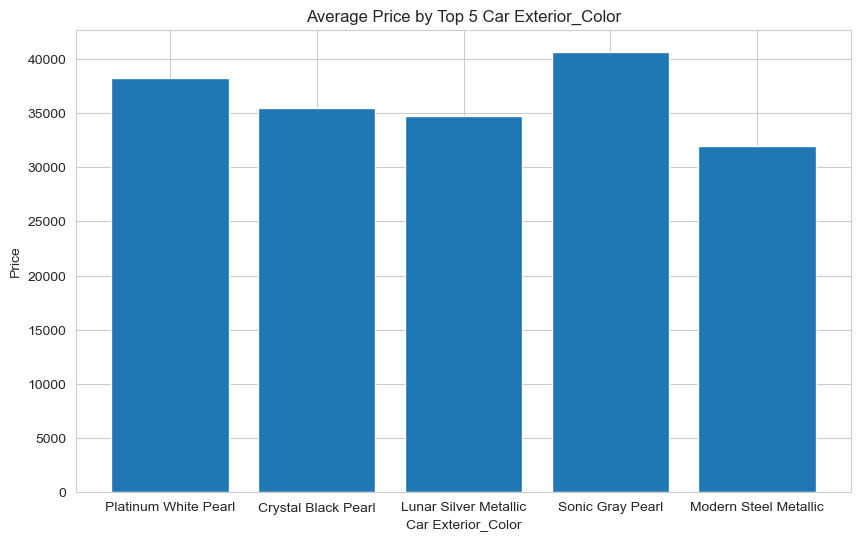

In [27]:
import matplotlib.pyplot as plt

# create pie chart
fig1 = plt.figure(figsize=(6, 6))
top_models = df_mean_imputed['Exterior_Color'].value_counts().nlargest(5)
labels = top_models.index
sizes = top_models.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 5 Car Exterior_Color by Count')

# create bar graph
fig2 = plt.figure(figsize=(10, 6))
top_models = df_mean_imputed['Exterior_Color'].value_counts().nlargest(5).index
cat_price = df_mean_imputed.groupby('Exterior_Color')['Price'].mean()[top_models]
plt.bar(cat_price.index, cat_price.values)
plt.title('Average Price by Top 5 Car Exterior_Color')
plt.xlabel('Car Exterior_Color')
plt.ylabel('Price')

plt.show()


In [71]:
import plotly.graph_objs as go
import pandas as pd

# create a dataframe of the top 5 car models by frequency and their mean price
top_models = df_mean_imputed['Exterior_Color'].value_counts().nlargest(10).index
cat_price = df_mean_imputed.groupby('Exterior_Color')['Price'].mean()[top_models]
df_top_models = pd.DataFrame({'Exterior_Color': cat_price.index, 'Price': cat_price.values})
df_top_models = df_top_models.sort_values(by='Price')

# create a horizontal bar plot using plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df_top_models['Price'], y=df_top_models['Exterior_Color'], orientation='h'))

# customize the layout of the plot
fig.update_layout(
    title='Top 10 Car Exterior_Color by Frequency with respect to Price',
    xaxis_title='Price',
    yaxis_title='Model',
    margin=dict(l=100, r=20, t=70, b=70),
    height=400,
    width=800,
)

# add percentage labels to each bar
for i, v in enumerate(df_top_models['Price']):
    fig.add_annotation(
        x=v+500,
        y=df_top_models.iloc[i]['Exterior_Color'],
        text='{:.1f}%'.format((df_mean_imputed['Exterior_Color'].value_counts(normalize=True)*100)[df_top_models.iloc[i]['Exterior_Color']]),
        showarrow=False,
        font=dict(size=15, color='black'),
    )

# show the plot
fig.show()


In [29]:
import pandas as pd

# count the number of occurrences of each unique value in the 'Interior_Color' column
counts = df_mean_imputed['Interior_Color'].value_counts()

print(counts)


Black                           2864
Gray                             790
–                                707
Beige                            214
Ivory                             79
                                ... 
Blk Clth                           1
Gry Lth                            1
Biege                              1
Bge Lth                            1
Nighthawk Black Pearl / Grey       1
Name: Interior_Color, Length: 62, dtype: int64


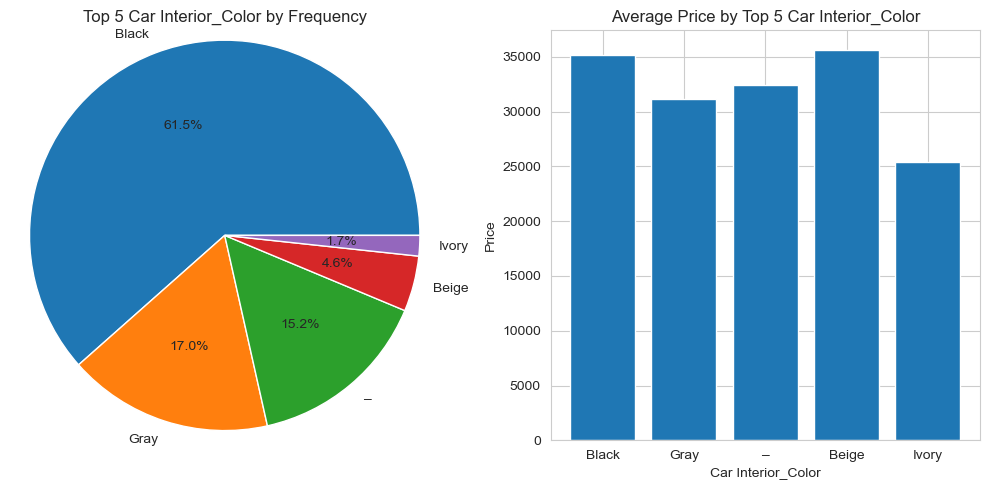

In [30]:
import matplotlib.pyplot as plt

# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# plot pie chart on first subplot
top_models = df_mean_imputed['Interior_Color'].value_counts().nlargest(5)
labels = top_models.index
sizes = top_models.values
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Top 5 Car Interior_Color by Frequency')

# plot bar chart on second subplot
top_models = df_mean_imputed['Interior_Color'].value_counts().nlargest(5).index
cat_price = df_mean_imputed.groupby('Interior_Color')['Price'].mean()[top_models]
ax2.bar(cat_price.index, cat_price.values)
ax2.set_title('Average Price by Top 5 Car Interior_Color')
ax2.set_xlabel('Car Interior_Color')
ax2.set_ylabel('Price')

# adjust spacing between subplots and show figure
plt.tight_layout()
plt.show()


In [72]:
import plotly.graph_objs as go
import pandas as pd

# create a dataframe of the top 5 car Interior_Color by frequency and their mean price
top_models = df_mean_imputed['Interior_Color'].value_counts().nlargest(10).index
cat_price = df_mean_imputed.groupby('Interior_Color')['Price'].mean()[top_models]
df_top_models = pd.DataFrame({'Interior_Color': cat_price.index, 'Price': cat_price.values})
df_top_models = df_top_models.sort_values(by='Price')

# create a horizontal bar plot using plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df_top_models['Price'], y=df_top_models['Interior_Color'], orientation='h'))

# customize the layout of the plot
fig.update_layout(
    title='Top 10 Car Interior_Color by Frequency with respect to Price',
    xaxis_title='Price',
    yaxis_title='Model',
    margin=dict(l=100, r=20, t=70, b=70),
    height=400,
    width=800,
)

# add percentage labels to each bar
for i, v in enumerate(df_top_models['Price']):
    fig.add_annotation(
        x=v+500,
        y=df_top_models.iloc[i]['Interior_Color'],
        text='{:.1f}%'.format((df_mean_imputed['Interior_Color'].value_counts(normalize=True)*100)[df_top_models.iloc[i]['Interior_Color']]),
        showarrow=False,
        font=dict(size=15, color='black'),
    )

# show the plot
fig.show()


In [32]:
import pandas as pd

# count the number of occurrences of each unique value in the 'Drivetrain' column
counts = df_mean_imputed['Drivetrain'].value_counts()

print(counts)


Front-wheel Drive    2313
All-wheel Drive      2261
FWD                   169
AWD                   110
Four-wheel Drive       77
Rear-wheel Drive       14
–                       5
Name: Drivetrain, dtype: int64


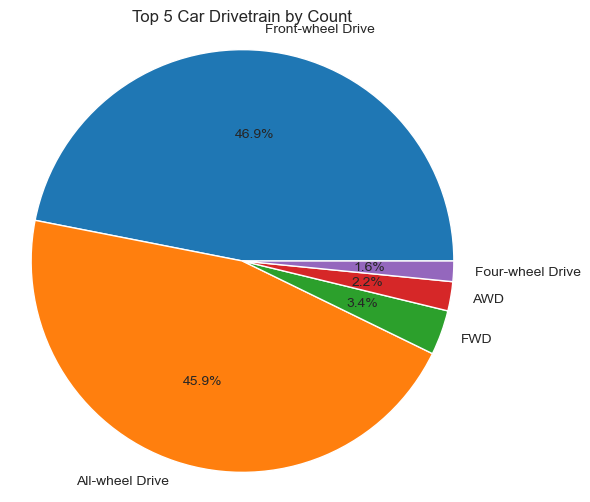

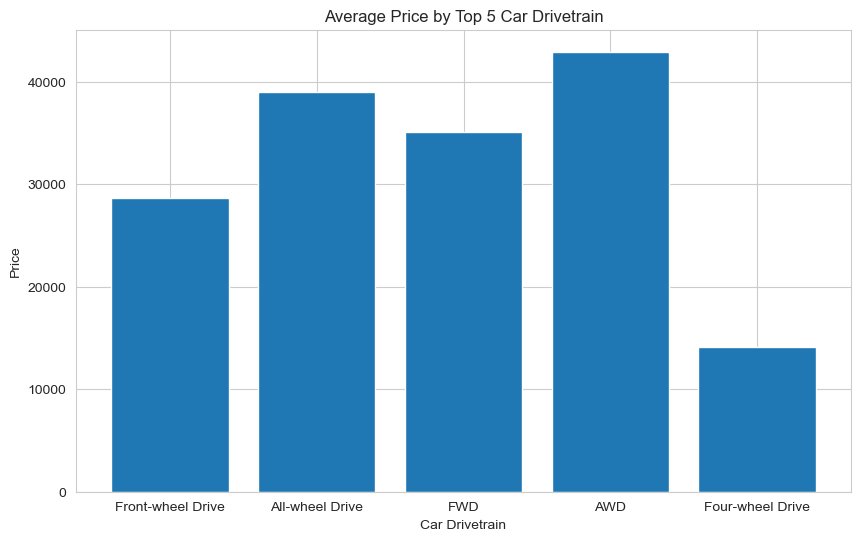

In [33]:
import matplotlib.pyplot as plt

# create pie chart
fig1 = plt.figure(figsize=(6, 6))
top_models = df_mean_imputed['Drivetrain'].value_counts().nlargest(5)
labels = top_models.index
sizes = top_models.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 5 Car Drivetrain by Count')

# create bar graph
fig2 = plt.figure(figsize=(10, 6))
top_models = df_mean_imputed['Drivetrain'].value_counts().nlargest(5).index
cat_price = df_mean_imputed.groupby('Drivetrain')['Price'].mean()[top_models]
plt.bar(cat_price.index, cat_price.values)
plt.title('Average Price by Top 5 Car Drivetrain')
plt.xlabel('Car Drivetrain')
plt.ylabel('Price')

plt.show()


In [74]:
import plotly.graph_objs as go
import pandas as pd

# create a dataframe of the top 5 car Drivetrain by frequency and their mean price
top_models = df_mean_imputed['Drivetrain'].value_counts().nlargest(10).index
cat_price = df_mean_imputed.groupby('Drivetrain')['Price'].mean()[top_models]
df_top_models = pd.DataFrame({'Drivetrain': cat_price.index, 'Price': cat_price.values})
df_top_models = df_top_models.sort_values(by='Price')

# create a horizontal bar plot using plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df_top_models['Price'], y=df_top_models['Drivetrain'], orientation='h'))

# customize the layout of the plot
fig.update_layout(
    title='Top 7 Car Drivetrain by Frequency with respect to Price',
    xaxis_title='Price',
    yaxis_title='Model',
    margin=dict(l=100, r=20, t=70, b=70),
    height=400,
    width=800,
)

# add percentage labels to each bar
for i, v in enumerate(df_top_models['Price']):
    fig.add_annotation(
        x=v+500,
        y=df_top_models.iloc[i]['Drivetrain'],
        text='{:.1f}%'.format((df_mean_imputed['Drivetrain'].value_counts(normalize=True)*100)[df_top_models.iloc[i]['Drivetrain']]),
        showarrow=False,
        font=dict(size=15, color='black'),
    )

# show the plot
fig.show()


In [35]:
import pandas as pd

# count the number of occurrences of each unique value in the 'Fuel_Type' column
counts = df_mean_imputed['Fuel_Type'].value_counts()

print(counts)


Gasoline                  4355
Hybrid                     587
A/T                          2
6-Speed M/T                  2
5-Speed A/T                  1
CVT Transmission             1
Compressed Natural Gas       1
Name: Fuel_Type, dtype: int64


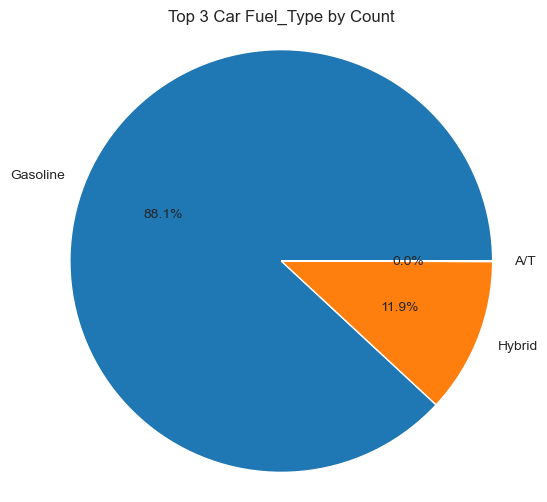

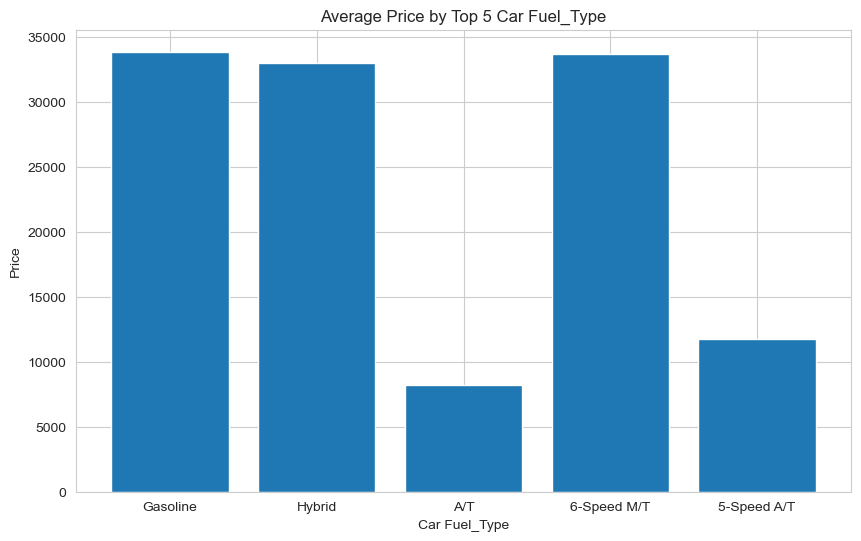

In [36]:
import matplotlib.pyplot as plt

# create pie chart
fig1 = plt.figure(figsize=(6, 6))
top_models = df_mean_imputed['Fuel_Type'].value_counts().nlargest(3)
labels = top_models.index
sizes = top_models.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 3 Car Fuel_Type by Count')

# create bar graph
fig2 = plt.figure(figsize=(10, 6))
top_models = df_mean_imputed['Fuel_Type'].value_counts().nlargest(5).index
cat_price = df_mean_imputed.groupby('Fuel_Type')['Price'].mean()[top_models]
plt.bar(cat_price.index, cat_price.values)
plt.title('Average Price by Top 5 Car Fuel_Type')
plt.xlabel('Car Fuel_Type')
plt.ylabel('Price')

plt.show()


In [75]:
import plotly.graph_objs as go
import pandas as pd

# create a dataframe of the top 5 car Fuel_Type by frequency and their mean price
top_models = df_mean_imputed['Fuel_Type'].value_counts().nlargest(10).index
cat_price = df_mean_imputed.groupby('Fuel_Type')['Price'].mean()[top_models]
df_top_models = pd.DataFrame({'Fuel_Type': cat_price.index, 'Price': cat_price.values})
df_top_models = df_top_models.sort_values(by='Price')

# create a horizontal bar plot using plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df_top_models['Price'], y=df_top_models['Fuel_Type'], orientation='h'))

# customize the layout of the plot
fig.update_layout(
    title='Top 7 Car Fuel_Type by Frequency with respect to Price',
    xaxis_title='Price',
    yaxis_title='Model',
    margin=dict(l=100, r=20, t=70, b=70),
    height=400,
    width=800,
)

# add percentage labels to each bar
for i, v in enumerate(df_top_models['Price']):
    fig.add_annotation(
        x=v+500,
        y=df_top_models.iloc[i]['Fuel_Type'],
        text='{:.1f}%'.format((df_mean_imputed['Fuel_Type'].value_counts(normalize=True)*100)[df_top_models.iloc[i]['Fuel_Type']]),
        showarrow=False,
        font=dict(size=15, color='black'),
    )

# show the plot
fig.show()


In [38]:
import pandas as pd

# count the number of occurrences of each unique value in the 'Transmission' column
counts = df_mean_imputed['Transmission'].value_counts()

print(counts)


Automatic CVT                                    1814
9-Speed Automatic                                1298
Automatic                                         410
10-Speed Automatic                                410
6-Speed Automatic                                 231
5-Speed Automatic                                 198
6-Speed Manual                                    162
Variable                                           87
Manual                                             33
9-SPEED A/T                                        30
continuously variable w/sport mode                 27
–                                                  26
CVT                                                20
continuously variable                              17
electronic continuously variable                   17
4-Speed Automatic                                  16
5-Speed Manual                                     13
10-SPEED A/T                                       13
continuously variable (m cvt

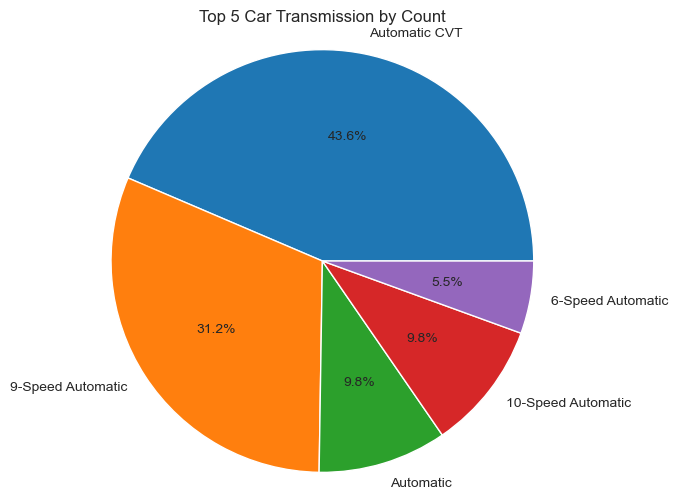

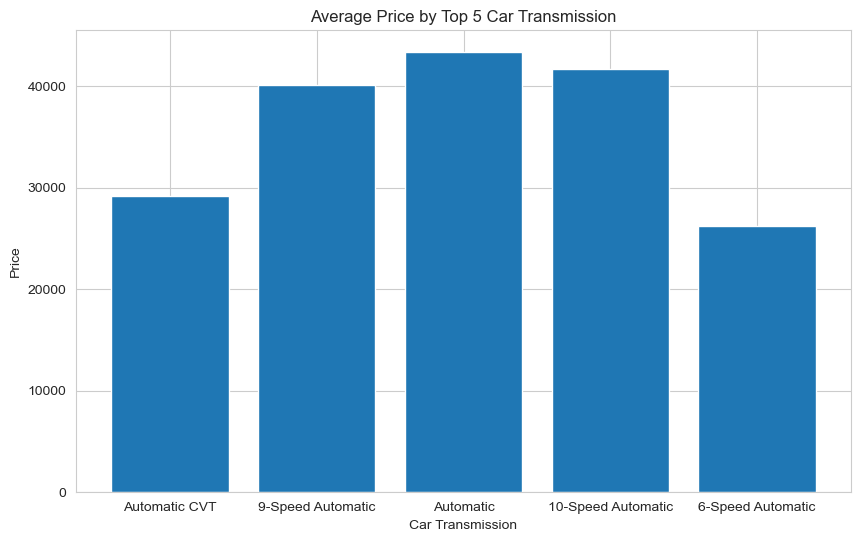

In [39]:
import matplotlib.pyplot as plt

# create pie chart
fig1 = plt.figure(figsize=(6, 6))
top_models = df_mean_imputed['Transmission'].value_counts().nlargest(5)
labels = top_models.index
sizes = top_models.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 5 Car Transmission by Count')

# create bar graph
fig2 = plt.figure(figsize=(10, 6))
top_models = df_mean_imputed['Transmission'].value_counts().nlargest(5).index
cat_price = df_mean_imputed.groupby('Transmission')['Price'].mean()[top_models]
plt.bar(cat_price.index, cat_price.values)
plt.title('Average Price by Top 5 Car Transmission')
plt.xlabel('Car Transmission')
plt.ylabel('Price')

plt.show()


In [76]:
import plotly.graph_objs as go
import pandas as pd

# create a dataframe of the top 5 car Transmission by frequency and their mean price
top_models = df_mean_imputed['Transmission'].value_counts().nlargest(10).index
cat_price = df_mean_imputed.groupby('Transmission')['Price'].mean()[top_models]
df_top_models = pd.DataFrame({'Transmission': cat_price.index, 'Price': cat_price.values})
df_top_models = df_top_models.sort_values(by='Price')

# create a horizontal bar plot using plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df_top_models['Price'], y=df_top_models['Transmission'], orientation='h'))

# customize the layout of the plot
fig.update_layout(
    title='Top 7 Car Transmission by Frequency with respect to Price',
    xaxis_title='Price',
    yaxis_title='Model',
    margin=dict(l=100, r=20, t=70, b=70),
    height=400,
    width=800,
)

# add percentage labels to each bar
for i, v in enumerate(df_top_models['Price']):
    fig.add_annotation(
        x=v+500,
        y=df_top_models.iloc[i]['Transmission'],
        text='{:.1f}%'.format((df_mean_imputed['Transmission'].value_counts(normalize=True)*100)[df_top_models.iloc[i]['Transmission']]),
        showarrow=False,
        font=dict(size=15, color='black'),
    )

# show the plot
fig.show()


In [41]:
import pandas as pd

# count the number of occurrences of each unique value in the 'Engine' column
counts = df_mean_imputed['Engine'].value_counts()

print(counts)

3.5L V6 24V GDI SOHC                                                1879
1.5L I4 16V GDI DOHC Turbo                                           922
2.0L I4 16V GDI DOHC                                                 208
2.0L I4 16V GDI DOHC Hybrid                                          205
2.0L I4 16V MPFI DOHC Hybrid                                         187
                                                                    ... 
2.0L I4 12V SOHC                                                       1
1.7L SOHC 16-valve I4 ULEV-certified engine                            1
1HGCP2F46CA229037                                                      1
1.5L SOHC MPFI 8-valve 2-stage i-VTEC I4 hybrid engine w/permane       1
2.4L DOHC MPFI 16-valve i-VTEC I4 engine                               1
Name: Engine, Length: 74, dtype: int64


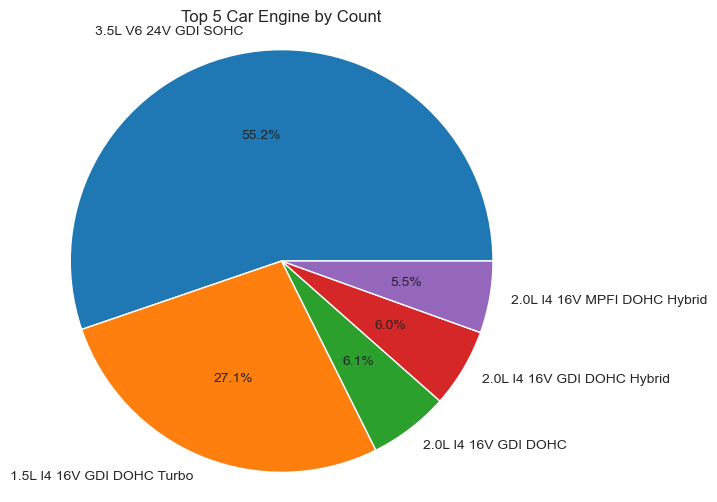

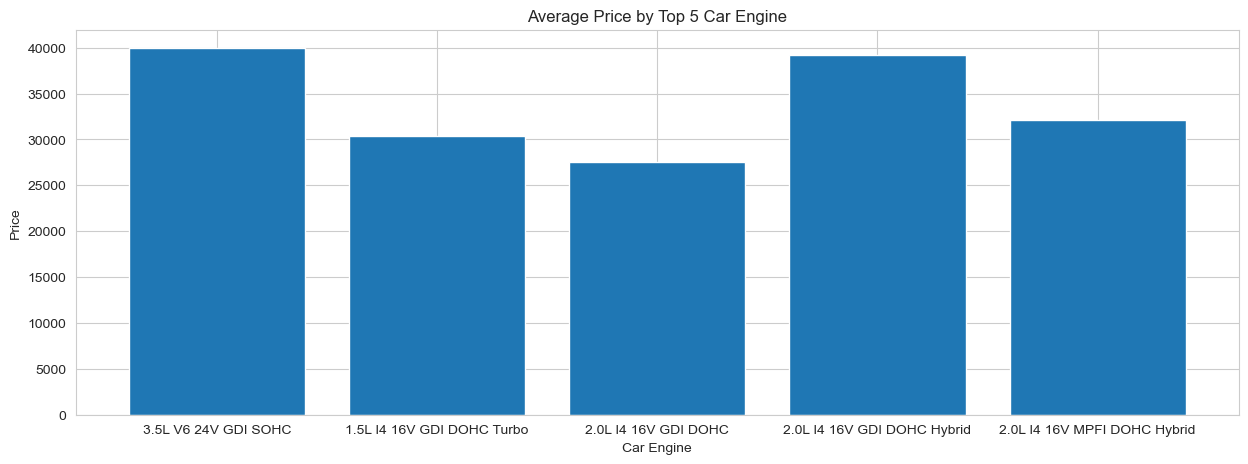

In [42]:
import matplotlib.pyplot as plt

# create pie chart
fig1 = plt.figure(figsize=(6, 6))
top_models = df_mean_imputed['Engine'].value_counts().nlargest(5)
labels = top_models.index
sizes = top_models.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 5 Car Engine by Count')

# create bar graph
fig2 = plt.figure(figsize=(15, 5))
top_models = df_mean_imputed['Engine'].value_counts().nlargest(5).index
cat_price = df_mean_imputed.groupby('Engine')['Price'].mean()[top_models]
plt.bar(cat_price.index, cat_price.values)
plt.title('Average Price by Top 5 Car Engine')
plt.xlabel('Car Engine')
plt.ylabel('Price')

plt.show()


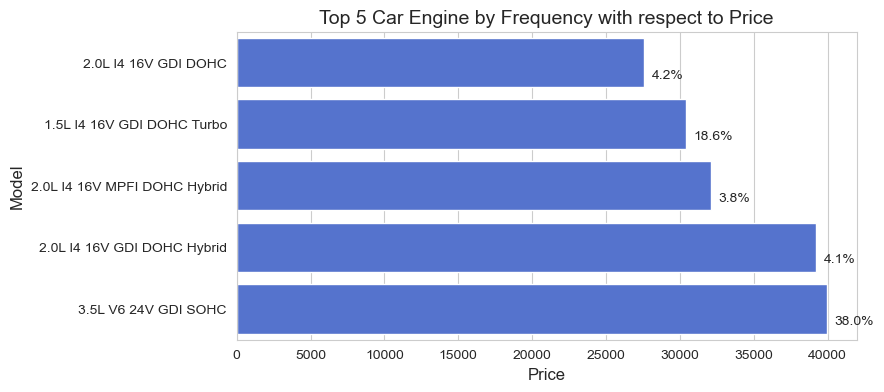

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a dataframe of the top 5 car Engine by frequency and their mean price
top_models = df_mean_imputed['Engine'].value_counts().nlargest(5).index
cat_price = df_mean_imputed.groupby('Engine')['Price'].mean()[top_models]
df_top_models = pd.DataFrame({'Engine': cat_price.index, 'Price': cat_price.values})
df_top_models = df_top_models.sort_values(by='Price')

# create a horizontal bar plot
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x='Price', y='Engine', data=df_top_models, color='royalblue')
ax.set_xlabel('Price', fontsize=12)
ax.set_ylabel('Model', fontsize=12)
ax.set_title('Top 5 Car Engine by Frequency with respect to Price', fontsize=14)

# add percentage labels to each bar
for i, v in enumerate(df_top_models['Price']):
    ax.text(v + 500, i + .25, '{:.1f}%'.format((df_mean_imputed['Engine'].value_counts(normalize=True)*100)[df_top_models.iloc[i]['Engine']]), fontsize=10)
    
plt.show()


In [44]:
import pandas as pd

# count the number of occurrences of each unique value in the 'State' column
counts = df_mean_imputed['State'].value_counts()

print(counts)

IL       329
CA       327
FL       323
TX       292
OH       266
NY       196
IN       195
NC       181
VA       161
NJ       152
GA       146
MN       144
PA       131
MO       131
WA       129
TN       126
MA       121
MD       118
WI       104
IA       100
LA        97
KY        93
MI        93
CT        87
CO        83
AZ        80
KS        70
OK        68
NE        65
AL        61
OR        59
AR        57
SC        41
NV        37
WV        29
UT        24
ID        19
ND        19
NH        18
ME        17
SD        17
VT        16
NM        13
DE        12
MT        10
MS         9
AK         7
WY         6
HI         3
RI         2
Route      1
Glens      1
MO-22      1
Name: State, dtype: int64


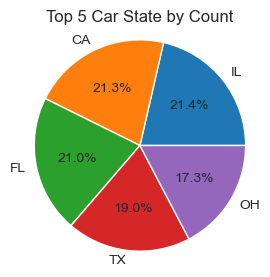

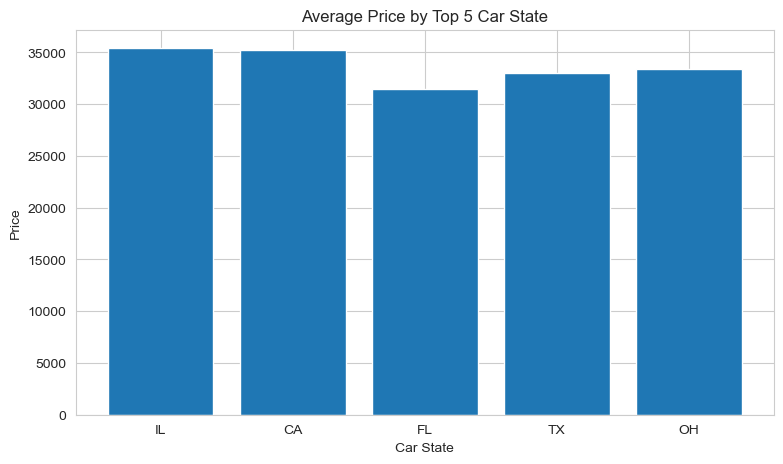

In [45]:
import matplotlib.pyplot as plt

# create pie chart
fig1 = plt.figure(figsize=(3, 3))
top_models = df_mean_imputed['State'].value_counts().nlargest(5)
labels = top_models.index
sizes = top_models.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 5 Car State by Count')

# create bar graph
fig2 = plt.figure(figsize=(9, 5))
top_models = df_mean_imputed['State'].value_counts().nlargest(5).index
cat_price = df_mean_imputed.groupby('State')['Price'].mean()[top_models]
plt.bar(cat_price.index, cat_price.values)
plt.title('Average Price by Top 5 Car State')
plt.xlabel('Car State')
plt.ylabel('Price')

plt.show()


In [82]:
import plotly.graph_objs as go
import pandas as pd

# create a dataframe of the top 5 car State by frequency and their mean price
top_models = df_mean_imputed['State'].value_counts().nlargest(10).index
cat_price = df_mean_imputed.groupby('State')['Price'].mean()[top_models]
df_top_models = pd.DataFrame({'State': cat_price.index, 'Price': cat_price.values})
df_top_models = df_top_models.sort_values(by='Price')

# create a horizontal bar plot using plotly
fig = go.Figure()
fig.add_trace(go.Bar(x=df_top_models['Price'], y=df_top_models['State'], orientation='h'))

# customize the layout of the plot
fig.update_layout(
    title='Top 10 Car State by Frequency with respect to Price',
    xaxis_title='Price',
    yaxis_title='Model',
    margin=dict(l=100, r=20, t=70, b=70),
    height=400,
    width=800,
)

# add percentage labels to each bar
for i, v in enumerate(df_top_models['Price']):
    fig.add_annotation(
        x=v+500,
        y=df_top_models.iloc[i]['State'],
        text='{:.1f}%'.format((df_mean_imputed['State'].value_counts(normalize=True)*100)[df_top_models.iloc[i]['State']]),
        showarrow=False,
        font=dict(size=15, color='black'),
    )

# show the plot
fig.show()


In [47]:
import pandas as pd

# perform one-hot encoding on multiple columns
df_encoded = pd.get_dummies(df_mean_imputed, columns=['Model', 'Condition','Exterior_Color','Interior_Color','Drivetrain','MPG','Fuel_Type','Transmission','Engine','State','Seller_Type'])

# display the encoded DataFrame
print(df_encoded.head())


   Year   Make    Price  Consumer_Rating  Consumer_Review_#  \
0  2023  Honda  46370.0              4.8                  9   
1  2023  Honda  34150.0              1.7                 24   
2  2023  Honda  34245.0              4.7               2869   
3  2022  Honda  46500.0              5.0                 12   
4  2023  Honda  40395.0              4.4                 12   

                 VIN   Stock_# Mileage  Comfort_Rating  \
0  5FPYK3F58PB011817  00830164      10             5.0   
1  2HKRS5H5XPH702953   6402953       –             5.0   
2  2HKRS5H55PH704805  PH704805       1             5.0   
3  5FNYF6H82NB100429  5700429B       5             5.0   
4  2HKRS6H90PH805954   5705954       5             5.0   

   Interior_Design_Rating  ...  State_TX  State_UT  State_VA  State_VT  \
0                     4.8  ...         0         0         0         0   
1                     3.0  ...         0         0         0         0   
2                     3.0  ...         0         0

C:\Users\sehja\AppData\Local\Temp\ipykernel_18540\416314931.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded.corr()


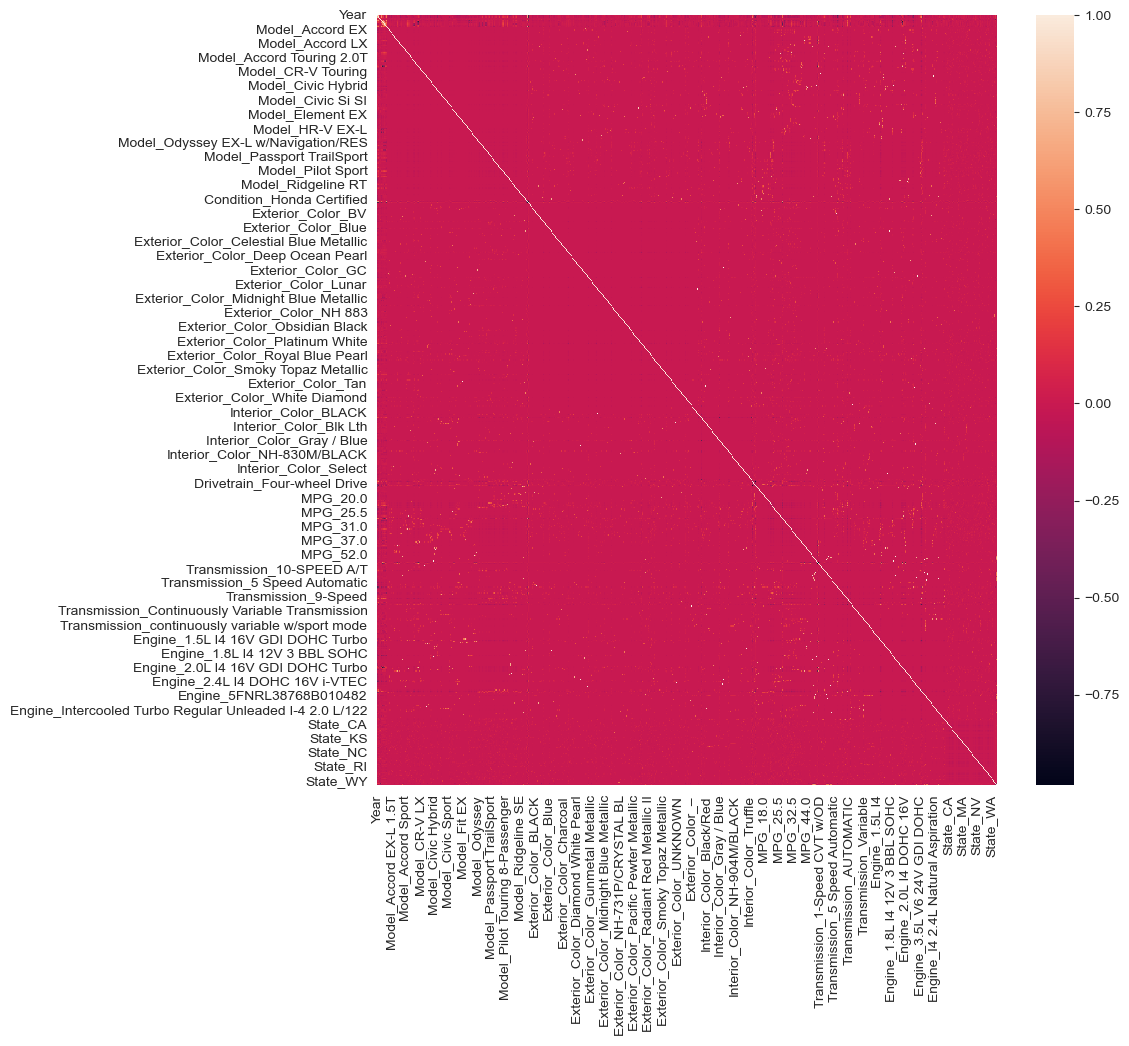

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_encoded.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix)
plt.show()


In [49]:
import pandas as pd

# find correlation between 'Price' column and all other columns
corr_matrix = df_encoded.corr()['Price']

print(corr_matrix)


C:\Users\sehja\AppData\Local\Temp\ipykernel_18540\3795535229.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded.corr()['Price']


Year                      0.701588
Price                     1.000000
Consumer_Rating           0.057310
Consumer_Review_#         0.048674
Comfort_Rating            0.550599
                            ...   
State_WI                 -0.025894
State_WV                  0.036004
State_WY                  0.004265
Seller_Type_Dealer        0.126418
Seller_Type_Individual   -0.048196
Name: Price, Length: 651, dtype: float64


In [50]:
import pandas as pd

# find correlation between 'Price' column and all other columns
corr_matrix = df_encoded.corr()['Price']

# filter the correlation matrix to only show correlations greater than 0.5
high_corr = corr_matrix[corr_matrix > 0.4]

print(high_corr)


C:\Users\sehja\AppData\Local\Temp\ipykernel_18540\3658880111.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_encoded.corr()['Price']


Year                           0.701588
Price                          1.000000
Comfort_Rating                 0.550599
Reliability_Rating             0.433149
Condition_New                  0.615605
Drivetrain_All-wheel Drive     0.468503
Engine_3.5L V6 24V GDI SOHC    0.473071
Name: Price, dtype: float64


In [51]:
from pycaret.regression import *


In [52]:
df2 = df_encoded.copy()

In [53]:
s = setup(df2, target='Price', fold=20, session_id=123)
best = compare_models()

# AUC (Area Under the Curve): a measure of the model's ability to distinguish between the positive and negative classes.
# Kappa:measure agreement between the model's predictions and the true labels taking into account the possibility of agreement occurring by chance.
# MCC (Matthews Correlation Coefficient): a measure of the correlation between the model's predictions and the true labels.
# TT (Training Time): the time taken to train the model.

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(4960, 655)"
4,Transformed data shape,"(4960, 655)"
5,Transformed train set shape,"(3472, 655)"
6,Transformed test set shape,"(1488, 655)"
7,Numeric features,650
8,Categorical features,4
9,Rows with missing values,0.2%


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,1566.4550,5639457.2375,2354.3157,0.9455,0.1080,0.0624,1.0730
rf,Random Forest Regressor,1531.5188,5760188.9576,2383.2111,0.9443,0.1051,0.0606,1.0215
lightgbm,Light Gradient Boosting Machine,1635.9232,6060846.9052,2444.6420,0.9413,0.1069,0.0637,0.6875
et,Extra Trees Regressor,1569.3718,6515404.9166,2535.1619,0.9366,0.1107,0.0623,1.0905
gbr,Gradient Boosting Regressor,2043.1111,7759287.1470,2776.2815,0.9249,0.1202,0.0783,0.7815
ridge,Ridge Regression,1882.3970,9142912.3305,2904.0387,0.9083,0.1583,0.0750,0.5775
llar,Lasso Least Angle Regression,1919.0928,9276168.5519,2930.6747,0.9072,0.1332,0.0746,0.6190
lasso,Lasso Regression,1842.2952,9338719.3051,2906.8555,0.9062,0.1406,0.0739,1.1225
dt,Decision Tree Regressor,1971.9019,10528007.1652,3213.3884,0.8982,0.1402,0.0778,0.6095
omp,Orthogonal Matching Pursuit,2094.9928,10472023.6566,3165.9775,0.8961,0.1442,0.0812,0.5985


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [54]:
from sklearn.model_selection import RandomizedSearchCV
# A parameter grid for XGBoost
params = {
          'learning_rate': [0.01, 0.05, 0.1],
          'max_depth': [3, 5, 7, 9],
          'min_child_weight': [1, 3, 5],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0],
          'n_estimators': [100, 200, 300]}
        

In [55]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing

X = df_encoded[['Year','Comfort_Rating','Condition_New','Reliability_Rating','Drivetrain_All-wheel Drive','Engine_3.5L V6 24V GDI SOHC']]
y = df_encoded['Price'].values

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
params = {'learning_rate': [0.01, 0.05, 0.1],
          'max_depth': [3, 5, 7, 9],
          'min_child_weight': [1, 3, 5],
          'subsample': [0.6, 0.8, 1.0],
          'colsample_bytree': [0.6, 0.8, 1.0],
          'n_estimators': [100, 200, 300]}

n_iters = [10, 50, 100]

for n_iter in n_iters:
    random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=n_iter,
                                   scoring='r2',  random_state=1001 )
    random_search.fit(X, y)
    print(f"Best params for n_iter={n_iter}: {random_search.best_params_}")


Best params for n_iter=10: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best params for n_iter=50: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best params for n_iter=100: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [56]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' ,5)
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([0.07204823, 0.17872238, 0.05648155, 0.04077954, 0.14449148,
       0.07260799, 0.06837587, 0.16926799, 0.05922909, 0.15686793,
       0.16944351, 0.10966187, 0.15686979, 0.09726362, 0.27671981,
       0.14124494, 0.19442177, 0.21014862, 0.078511  , 0.19587021,
       0.27125859, 0.30911074, 0.28858376, 0.06896014, 0.17359486,
       0.0721077 , 0.15997076, 0.06585855, 0.12546444, 0.22685142,
       0.18507318, 0.21950307, 0.30106769, 0.16319771, 0.11278729,
       0.19764881, 0.16309371, 0.19967346, 0.0752079 , 0.17569757,
       0.26028214, 0.04703112, 0.29481072, 0.05023146, 0.27750645,
       0.05960736, 0.16394224, 0.17812147, 0.10301228, 0.08155932,
       0.17177272, 0.07843719, 0.05335693, 0.2477098 , 0.29793706,
       0.13451557, 0.10773902, 0.0626318 , 0.14741621, 0.1984479 ,
       0.05195508, 0.0943603 , 0.240452  , 0.1411685 , 0.0345295 ,
       0.10351195, 0.15676751, 0.05335727, 0.05348058, 0.1126627 ,
       0.16632104, 0.19754663

In [57]:
# 'subsample': 1.0, 'min_child_weight': 3, 'max_depth': 9, 'gamma': 0.5, 'colsample_bytree': 0.8
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,subsample=1,min_child_weight=3,n_estimators=200,
                            max_depth=9,gamma=0.5,colsample_bytree=0.8,learning_rate=0.05)

In [59]:
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X, y, scoring="r2", cv=5)
print("Cross-validation scores:", scores)
print("Mean:", np.mean(scores))
print("Standard deviation:", np.std(scores))


Cross-validation scores: [0.75426082 0.84994597 0.82314778 0.83932191 0.86450914]
Mean: 0.8262371250348375
Standard deviation: 0.038440083337272286
